# HR Analytics Project

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [1]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import dataframe
df = pd.read_excel("hr analytics.xlsx")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
# to check number of rows and columns
df.shape

(1470, 35)

In [6]:
# to check column names
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [7]:
#to check for duplicate values
df.duplicated().sum()

0

In [8]:
# to get detail of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

dataset has 35 columns and 1469 rows

In [9]:
# show all columns in a dataframe
pd.set_option('display.max_columns', None) 

In [10]:
#to convert catagorical values into numbers
le = LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Over18']=le.fit_transform(df['Over18'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['OverTime']=le.fit_transform(df['OverTime'])
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'Department'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EducationField'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobRole'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>],
       [<AxesSub

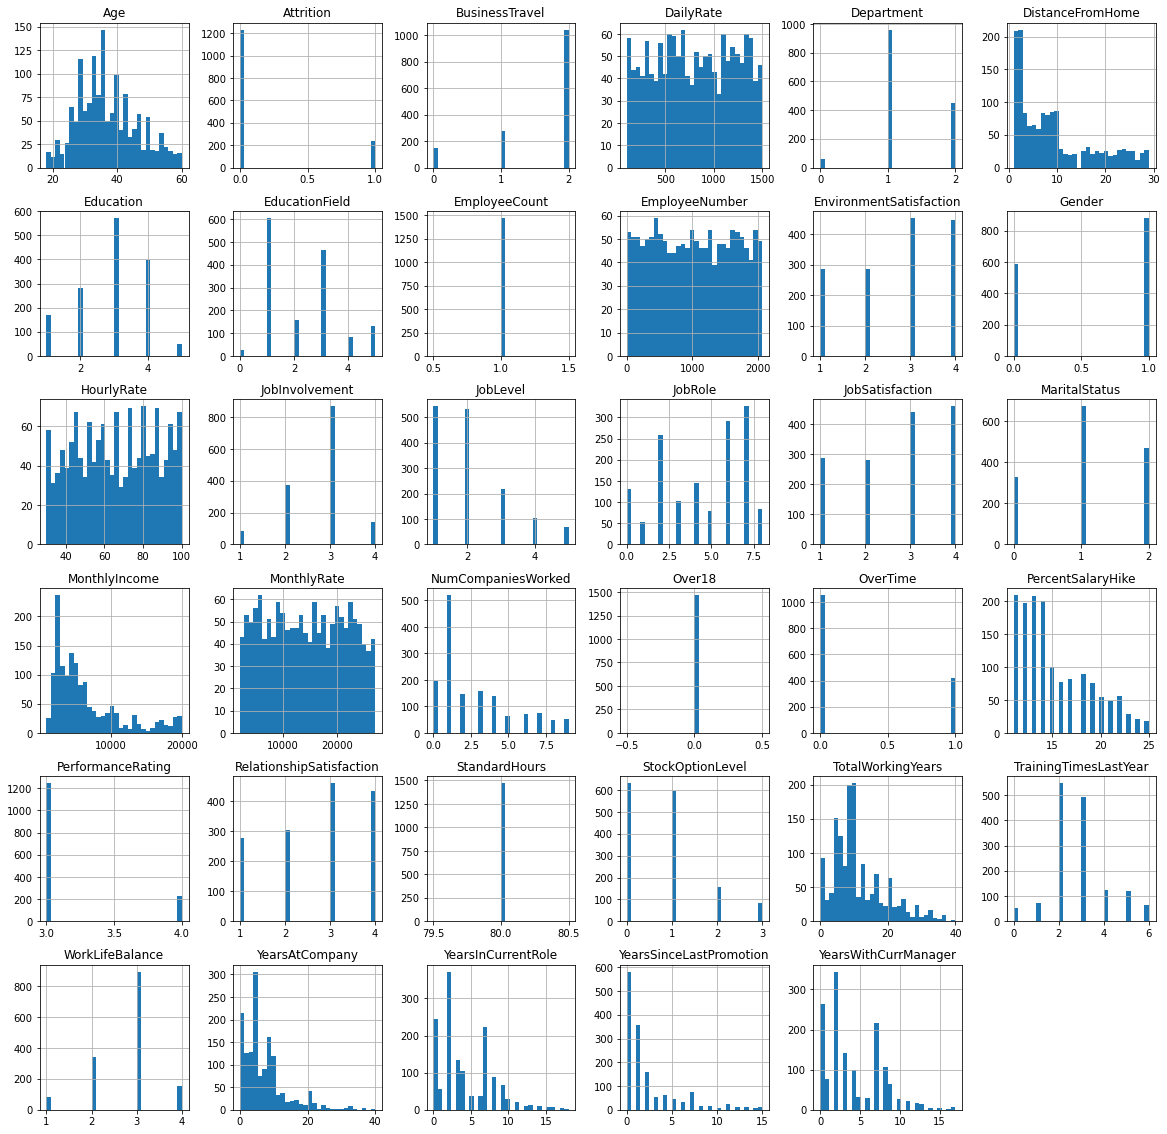

In [11]:
# to plot histogram
df.hist(bins=30,figsize=(20,20))

*'EmployeeCount','StandardHours','Over18','EmployeeNumber' columns are all similar and add no value to the dataset

*there is high skewness in few columns like 'years at company','monthly income','distance from home'.

In [12]:
# to check the dataset after dropping 4 columns
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


In [13]:
df.shape

(1470, 31)

In [14]:
# to get statistical analysis of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.0,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.0,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.0,2.0,3.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
Gender,1470.0,0.600000,0.490065,0.0,0.0,1.0,1.00,1.0


* there are no null values in the dataset

* there is lot of variation in the mean of the columns

In [15]:
# to analyse the correlation of each column
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

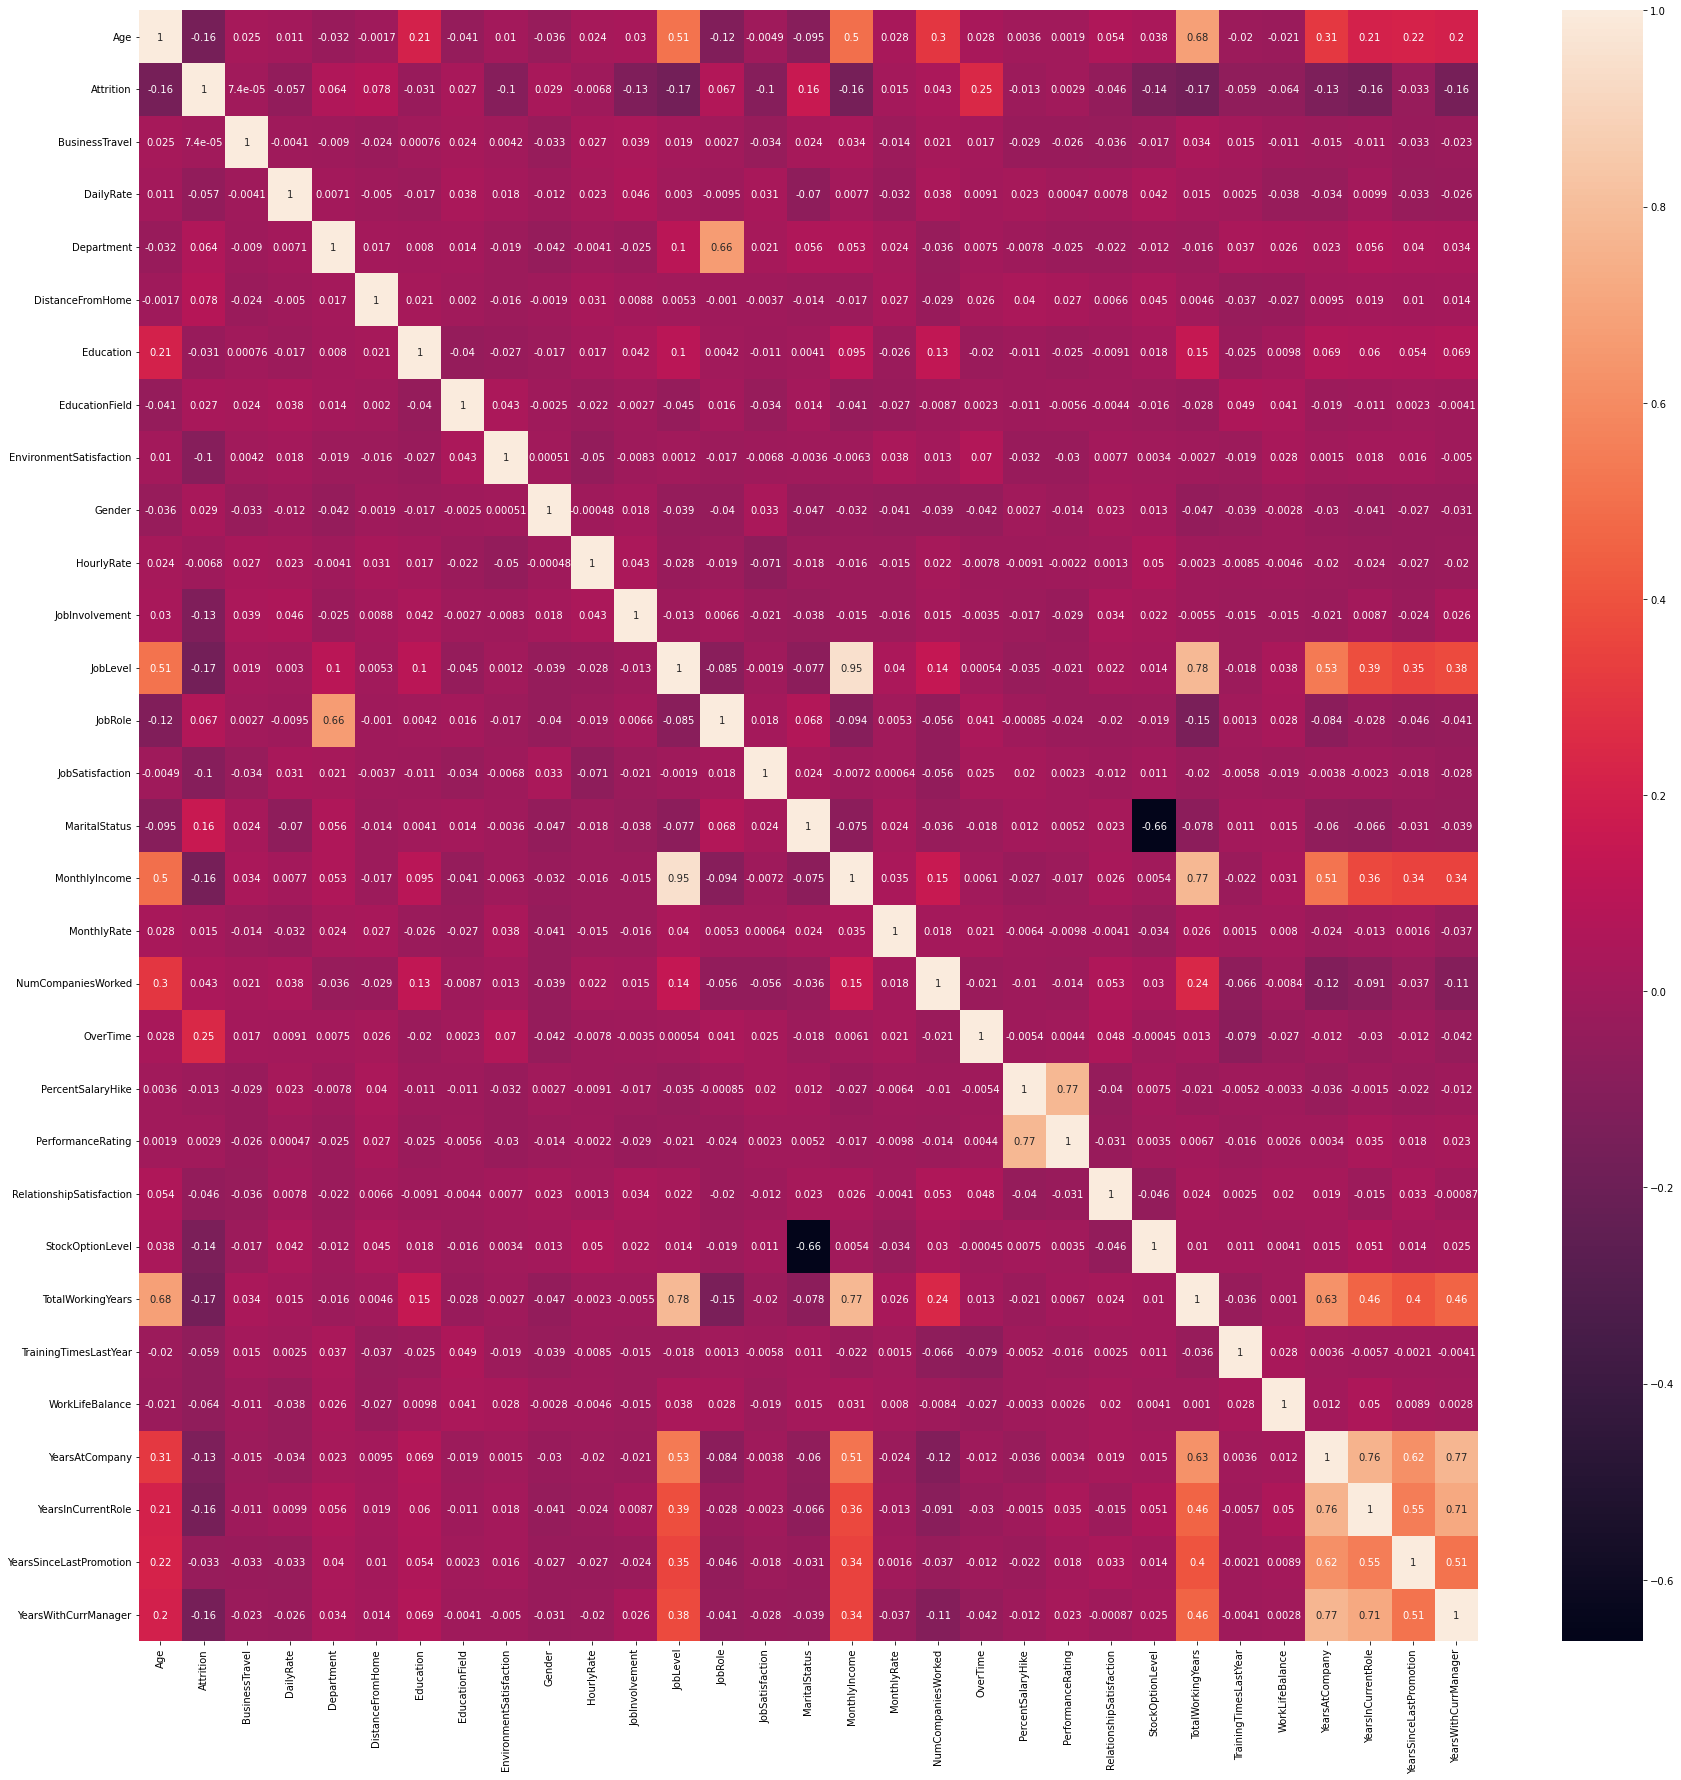

In [16]:
# to plot heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),color ='k',annot=True)

* JobLevel has high mulicollinearity with MothlyIncome

* Attrition has almost no correlation with any columns.

* MonthlyIncome and TotalWorkingYears has positive correlation with each other.

In [17]:
#high multicollinearity
df.drop(['JobLevel'],axis=1,inplace=True)
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


In [18]:
df.shape

(1470, 30)

In [20]:
# copy the data
df1 = df.copy()
  
# apply normalization techniques(min max)
for column in df1.columns:
    df1[column] = (df1[column] - df1[column].min()) / (df1[column].max() - df1[column].min())    
  
 # view normalized data
print(df1)

           Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.547619        1.0             1.0   0.715820         1.0   
1     0.738095        0.0             0.5   0.126700         0.5   
2     0.452381        1.0             1.0   0.909807         0.5   
3     0.357143        0.0             0.5   0.923407         0.5   
4     0.214286        0.0             1.0   0.350036         0.5   
...        ...        ...             ...        ...         ...   
1465  0.428571        0.0             0.5   0.559771         0.5   
1466  0.500000        0.0             1.0   0.365784         0.5   
1467  0.214286        0.0             1.0   0.037938         0.5   
1468  0.738095        0.0             0.5   0.659270         1.0   
1469  0.380952        0.0             1.0   0.376521         0.5   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0             0.000000       0.25             0.2                 0.333333   
1             0.250000     

Age                            AxesSubplot(0.125,0.772143;0.133621x0.107857)
Attrition                   AxesSubplot(0.285345,0.772143;0.133621x0.107857)
BusinessTravel               AxesSubplot(0.44569,0.772143;0.133621x0.107857)
DailyRate                   AxesSubplot(0.606034,0.772143;0.133621x0.107857)
Department                  AxesSubplot(0.766379,0.772143;0.133621x0.107857)
DistanceFromHome               AxesSubplot(0.125,0.642714;0.133621x0.107857)
Education                   AxesSubplot(0.285345,0.642714;0.133621x0.107857)
EducationField               AxesSubplot(0.44569,0.642714;0.133621x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.606034,0.642714;0.133621x0.107857)
Gender                      AxesSubplot(0.766379,0.642714;0.133621x0.107857)
HourlyRate                     AxesSubplot(0.125,0.513286;0.133621x0.107857)
JobInvolvement              AxesSubplot(0.285345,0.513286;0.133621x0.107857)
JobRole                      AxesSubplot(0.44569,0.513286;0.133621x0.107857)

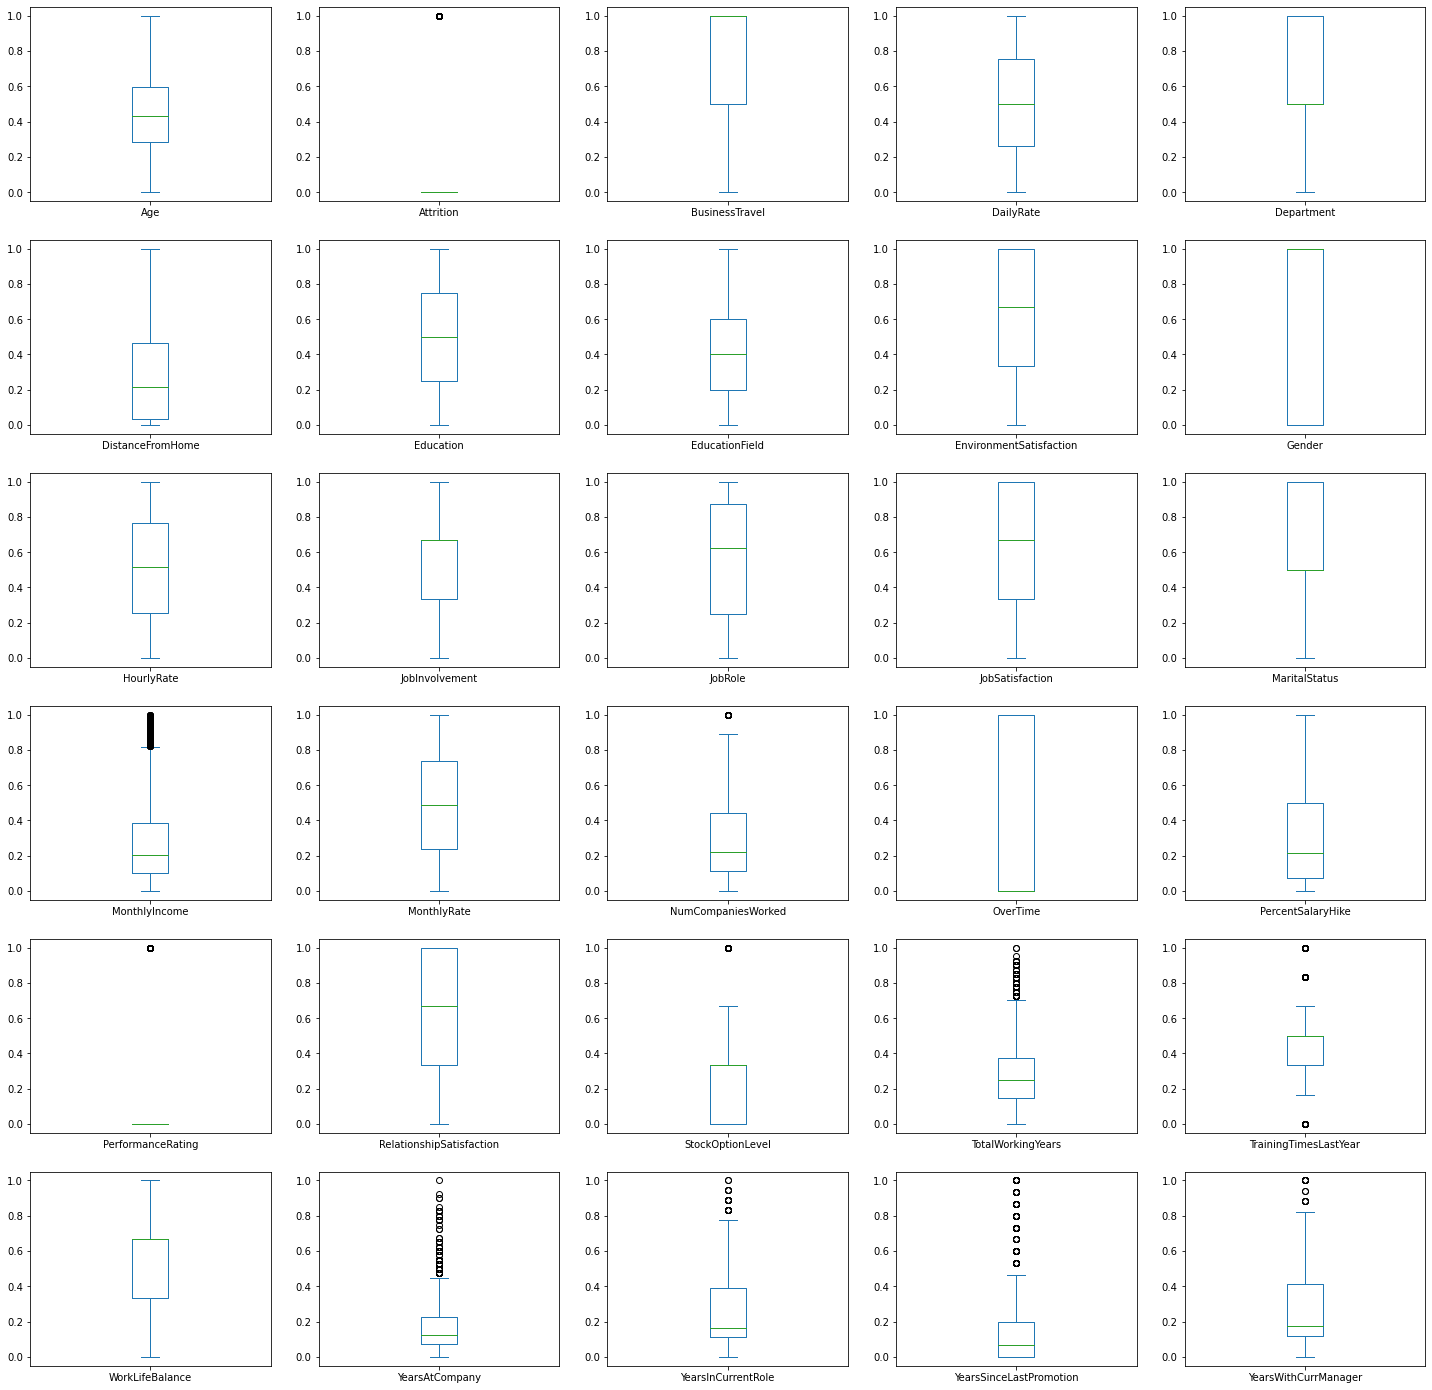

In [21]:
# to find out outliers in the dataset
df1.plot(kind='box',subplots=True, layout=(6,5),figsize=(25,25))

* the above plots shows that there are many outliers in few columns

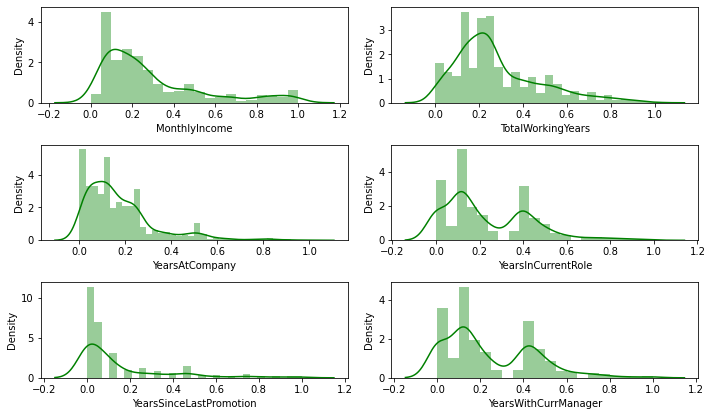

In [22]:
columns = ['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
           'YearsWithCurrManager']
plt.figure(figsize = (10,15))
for i in range(len(columns)):
    plt.subplot(8,2, i+1)
    sns.distplot(df1[columns[i]],color = 'g');
plt.tight_layout()

* above plot shows that all columns are right skewed.

In [23]:
# to check skewness in the data
df1.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

In [24]:
#to remove the skewness in the dataset
from sklearn.preprocessing import power_transform
df_new = power_transform(df1)

In [25]:
df = pd.DataFrame(df_new,columns = df1.columns)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.524297,2.280906,0.636749,0.751151,1.376024,-1.336964,-0.917077,-0.975490,-0.715066,-1.224745,1.369455,0.323767,1.068213,1.201944,1.248298,0.259658,0.738473,1.652567,1.591746,-1.483300,-0.426230,-1.516511,-1.077487,-0.277045,-2.595363,-2.145311,0.107392,0.166219,-1.012841,0.477322
1,1.280776,-0.438422,-1.421278,-1.312970,-0.470874,0.165761,-1.757783,-0.975490,0.196615,0.816497,-0.226556,-1.055811,0.591771,-0.717968,-0.149494,-0.003132,1.453055,-0.642937,-0.628241,1.682573,2.346151,1.238185,0.520374,0.051540,0.232587,0.274615,0.831590,0.923210,-0.099306,0.946132
2,0.101146,2.280906,0.636749,1.391049,-0.470874,-1.051329,-0.917077,1.264921,1.218770,0.816497,1.274532,-1.055811,-1.028642,0.185261,1.248298,-1.373132,-1.736385,1.328700,1.591746,0.198366,-0.426230,-0.708120,-1.077487,-0.458771,0.232587,0.274615,-1.841862,-1.479542,-1.012841,-1.435367
3,-0.358058,-0.438422,-1.421278,1.435312,-0.470874,-0.794769,1.084316,-0.975490,1.218770,-1.224745,-0.474616,0.323767,0.591771,0.185261,-0.149494,-0.917410,1.225897,-0.642937,1.591746,-1.483300,-0.426230,0.213990,-1.077487,-0.277045,0.232587,0.274615,0.508336,0.923210,0.902749,-1.435367
4,-1.127875,-0.438422,0.636749,-0.505623,-0.470874,-1.051329,-1.757783,0.703003,-1.504981,0.816497,-1.281892,0.323767,-1.028642,-0.717968,-0.149494,-0.648069,0.352080,1.772620,-0.628241,-0.949798,-0.426230,1.238185,0.520374,-0.653578,0.232587,0.274615,-1.029590,-0.535283,0.499854,-0.500195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.010065,-0.438422,-1.421278,0.223740,-0.470874,1.486785,-0.917077,0.703003,0.196615,0.816497,-1.230782,2.020240,-1.028642,1.201944,-0.149494,-1.095996,-0.254790,0.826824,-0.628241,0.719619,-0.426230,0.213990,0.520374,0.922458,0.232587,0.274615,-0.129216,-0.535283,-1.012841,-0.128359
1466,0.316905,-0.438422,0.636749,-0.449960,-0.470874,-0.164535,-1.757783,0.703003,1.218770,0.816497,-1.179764,-1.055811,-1.662531,-1.496701,-0.149494,1.072925,1.002066,0.826824,-0.628241,0.198366,-0.426230,-1.516511,0.520374,-0.107277,1.605672,0.274615,0.318869,0.923210,-0.099306,0.946132
1467,-1.127875,-0.438422,0.636749,-1.644255,-0.470874,-0.563497,0.032821,-0.975490,-0.715066,0.816497,1.036287,2.020240,-0.276165,-0.717968,-0.149494,0.300991,-1.304202,-0.642937,1.591746,1.284332,2.346151,-0.708120,0.520374,-0.653578,-2.595363,0.274615,0.107392,-0.535283,-1.012841,-0.128359
1468,1.280776,-0.438422,-1.421278,0.561409,1.376024,-1.051329,0.032821,0.703003,1.218770,0.816497,-0.127844,-1.055811,1.068213,-0.717968,-0.149494,0.080481,-0.119639,-0.006226,-0.628241,-0.124959,-0.426230,1.238185,-1.077487,0.922458,0.232587,-1.105176,0.678474,0.701748,-1.012841,1.141911


In [26]:
#to check if skweness is lying between -0.5 to 0.5
df.skew()[np.abs(df.skew()) < 0.5].all()

True

Age                            AxesSubplot(0.125,0.772143;0.133621x0.107857)
Attrition                   AxesSubplot(0.285345,0.772143;0.133621x0.107857)
BusinessTravel               AxesSubplot(0.44569,0.772143;0.133621x0.107857)
DailyRate                   AxesSubplot(0.606034,0.772143;0.133621x0.107857)
Department                  AxesSubplot(0.766379,0.772143;0.133621x0.107857)
DistanceFromHome               AxesSubplot(0.125,0.642714;0.133621x0.107857)
Education                   AxesSubplot(0.285345,0.642714;0.133621x0.107857)
EducationField               AxesSubplot(0.44569,0.642714;0.133621x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.606034,0.642714;0.133621x0.107857)
Gender                      AxesSubplot(0.766379,0.642714;0.133621x0.107857)
HourlyRate                     AxesSubplot(0.125,0.513286;0.133621x0.107857)
JobInvolvement              AxesSubplot(0.285345,0.513286;0.133621x0.107857)
JobRole                      AxesSubplot(0.44569,0.513286;0.133621x0.107857)

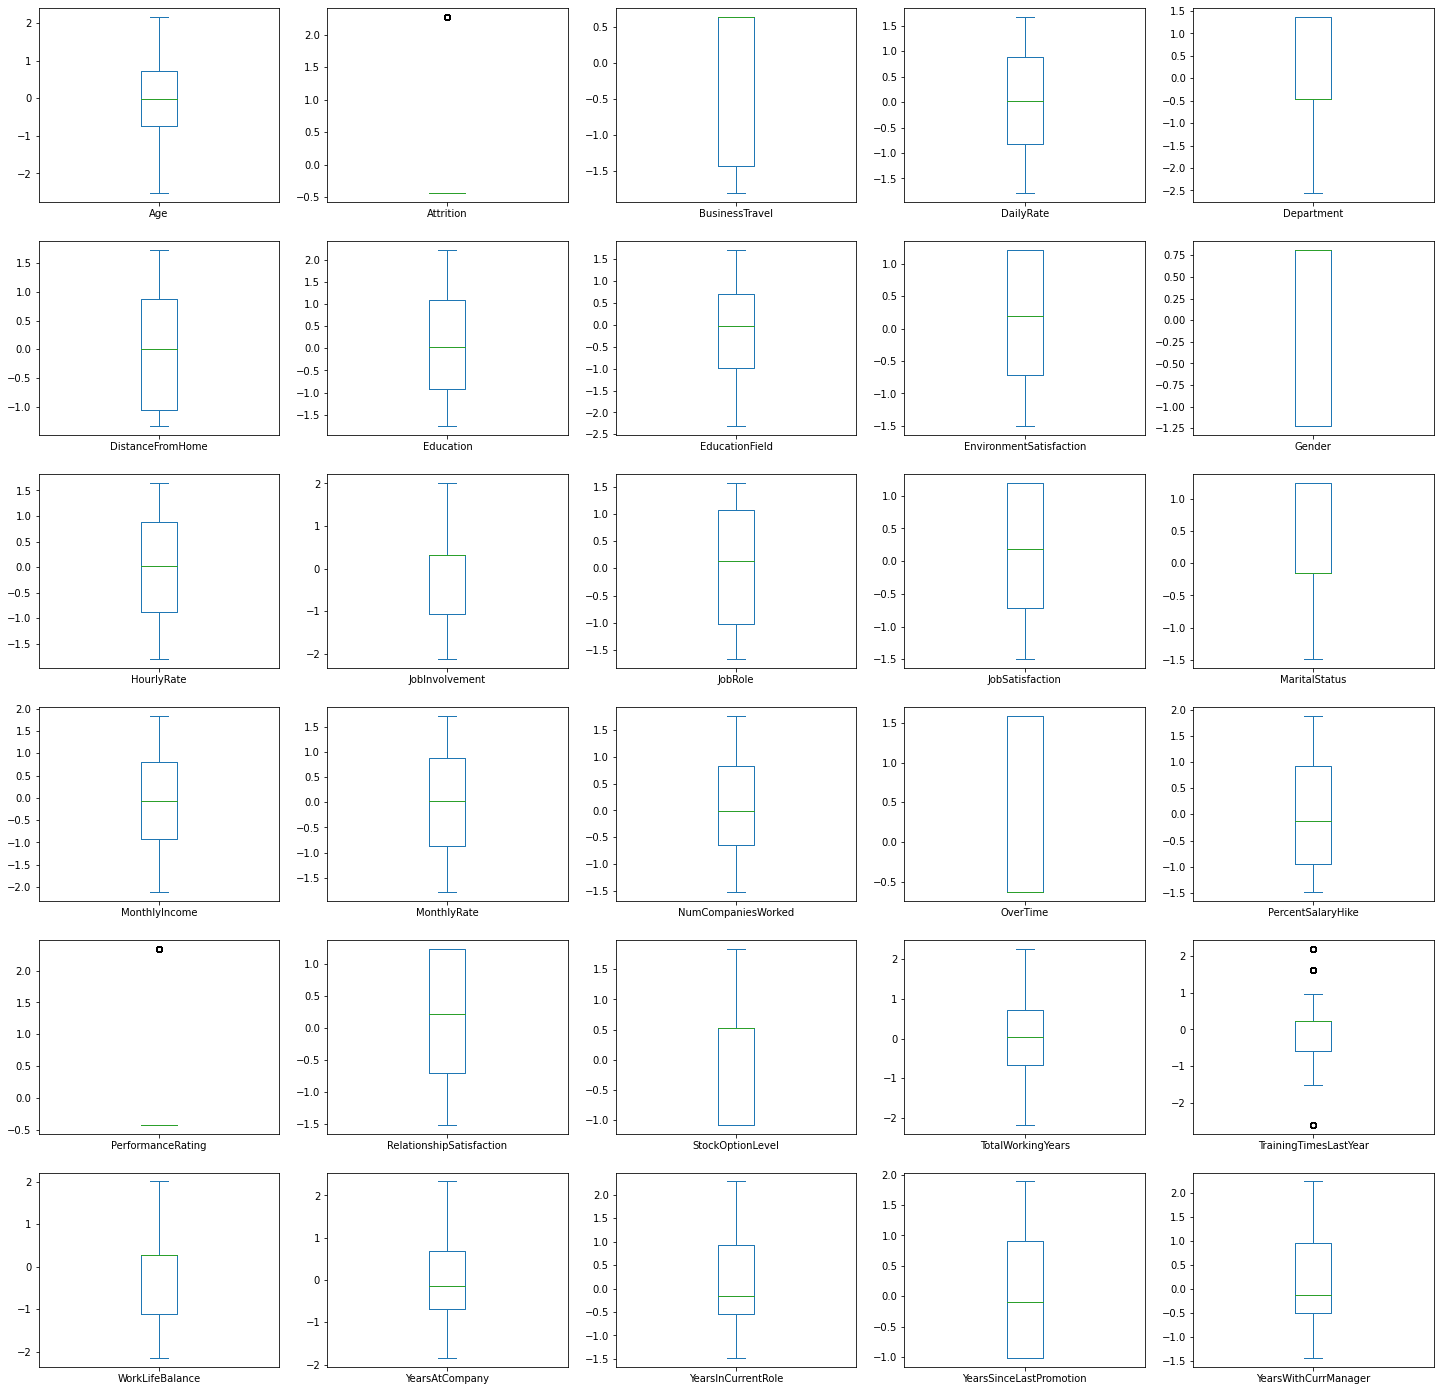

In [27]:
# to find out outliers in the dataset
df.plot(kind='box',subplots=True, layout=(6,5),figsize=(25,25))

In [28]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(df)) < 3).all()

Age                         True
Attrition                   True
BusinessTravel              True
DailyRate                   True
Department                  True
DistanceFromHome            True
Education                   True
EducationField              True
EnvironmentSatisfaction     True
Gender                      True
HourlyRate                  True
JobInvolvement              True
JobRole                     True
JobSatisfaction             True
MaritalStatus               True
MonthlyIncome               True
MonthlyRate                 True
NumCompaniesWorked          True
OverTime                    True
PercentSalaryHike           True
PerformanceRating           True
RelationshipSatisfaction    True
StockOptionLevel            True
TotalWorkingYears           True
TrainingTimesLastYear       True
WorkLifeBalance             True
YearsAtCompany              True
YearsInCurrentRole          True
YearsSinceLastPromotion     True
YearsWithCurrManager        True
dtype: boo

In [29]:
#seperate feature variable and target variable
x = df.drop (['Attrition'], axis = 1)
y = df['Attrition']

In [30]:
x.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [31]:
y

0       2.280906
1      -0.438422
2       2.280906
3      -0.438422
4      -0.438422
          ...   
1465   -0.438422
1466   -0.438422
1467   -0.438422
1468   -0.438422
1469   -0.438422
Name: Attrition, Length: 1470, dtype: float64

In [32]:
#to convert y in to integer
le = LabelEncoder()
y=le.fit_transform(y)
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1470):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)
    

Best accuracy is 0.9251700680272109 on Random_State 614


In [34]:
#spliting dataset into training(80%) and testing(20%)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=614)

In [35]:
# to check shape after spliting
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (1176, 29)
shape of y_train: (1176, 29)
shape of x_test: (294, 29)
shape of y_test: (294,)


In [36]:
#build a logistic regression classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 92.51700680272108
[[254   3]
 [ 19  18]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       257
           1       0.86      0.49      0.62        37

    accuracy                           0.93       294
   macro avg       0.89      0.74      0.79       294
weighted avg       0.92      0.93      0.92       294



In [37]:
#build a RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(x_train, y_train)
predlr = RF.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 90.81632653061224
[[257   0]
 [ 27  10]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       257
           1       1.00      0.27      0.43        37

    accuracy                           0.91       294
   macro avg       0.95      0.64      0.69       294
weighted avg       0.92      0.91      0.88       294



In [38]:
# build a DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(x_train, y_train)
predlr = DT.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 84.35374149659864
[[229  28]
 [ 18  19]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       257
           1       0.40      0.51      0.45        37

    accuracy                           0.84       294
   macro avg       0.67      0.70      0.68       294
weighted avg       0.86      0.84      0.85       294



In [39]:
#build a SVC model
svc=SVC()
svc.fit(x_train,y_train)
predlr = svc.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 90.81632653061224
[[256   1]
 [ 26  11]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       257
           1       0.92      0.30      0.45        37

    accuracy                           0.91       294
   macro avg       0.91      0.65      0.70       294
weighted avg       0.91      0.91      0.89       294



In [40]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(LR,x,y,cv=None).mean())
print('cross validation score of desicion tree model = ', cross_val_score(DT,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())

cross validation score of random forest model =  0.8612244897959183
cross validation score of logistic regression model =  0.8721088435374149
cross validation score of desicion tree model =  0.7884353741496598
cross validation score of standard vector machine model =  0.8646258503401361


In [41]:
#hyperparameter tuning with LogisticRegression, parameters of LogisticRegression
parameters = {'penalty':['l2'],
             'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [42]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(LogisticRegression(random_state=614), parameters, verbose=1, cv=10, n_jobs=-1)

In [43]:
#training the model
gcv.fit(x_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=614), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [45]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [46]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [47]:
# finding best estimator
gcv.best_estimator_

LogisticRegression(C=0.1, random_state=614, solver='newton-cg')

In [48]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc1 =accuracy_score(y_test,pred)
print(acc*100)

87.07482993197279


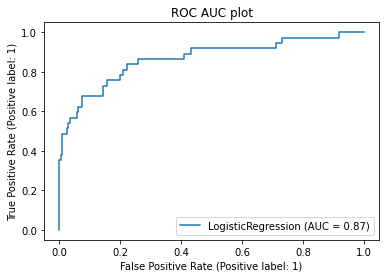

In [49]:
#ploting ROC and AUC curve
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

In [50]:
#saving the model
model = LogisticRegression(C=0.1, random_state=614, solver='newton-cg')
model.fit(x_train,y_train)

LogisticRegression(C=0.1, random_state=614, solver='newton-cg')

In [51]:
import joblib
joblib.dump(model,'hr_analytics')

['hr_analytics']